<a href="https://colab.research.google.com/github/arpitaggarwal0511/Assignment03---Topsis-for-Pretrained-Models/blob/main/Topsis_TEXT_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Define the models and their performance metrics
models = ['BERT', 'RoBERTa', 'DistilBERT', 'XLNet', 'ALBERT']
accuracy = [0.91, 0.92, 0.89, 0.90, 0.90]  # Example accuracy scores
f1_score = [0.90, 0.91, 0.88, 0.89, 0.89]  # Example F1-scores
inference_time = [120, 130, 80, 150, 100]  # Example inference times in milliseconds
model_size = [420, 500, 250, 450, 300]     # Example model sizes in megabytes


In [3]:
# Create a DataFrame to hold the data
data = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'F1-Score': f1_score,
    'Inference Time (ms)': inference_time,
    'Model Size (MB)': model_size
})

In [4]:
# Display the data
print("Performance Metrics of Pre-Trained Models:")
print(data)

Performance Metrics of Pre-Trained Models:
        Model  Accuracy  F1-Score  Inference Time (ms)  Model Size (MB)
0        BERT      0.91      0.90                  120              420
1     RoBERTa      0.92      0.91                  130              500
2  DistilBERT      0.89      0.88                   80              250
3       XLNet      0.90      0.89                  150              450
4      ALBERT      0.90      0.89                  100              300


In [5]:
# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data.iloc[:, 1:])

In [6]:
# Define the weights for each criterion
# Assuming equal importance for all criteria
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [7]:
# Calculate the weighted normalized decision matrix
weighted_normalized_data = normalized_data * weights

In [8]:
# Determine the ideal and negative-ideal solutions
ideal_solution = np.max(weighted_normalized_data, axis=0)
negative_ideal_solution = np.min(weighted_normalized_data, axis=0)

In [9]:
# Calculate the Euclidean distance from the ideal and negative-ideal solutions
distance_to_ideal = np.sqrt(np.sum((weighted_normalized_data - ideal_solution) ** 2, axis=1))
distance_to_negative_ideal = np.sqrt(np.sum((weighted_normalized_data - negative_ideal_solution) ** 2, axis=1))

In [10]:
# Calculate the TOPSIS score
topsis_score = distance_to_negative_ideal / (distance_to_ideal + distance_to_negative_ideal)

In [11]:
# Add the TOPSIS score to the DataFrame
data['TOPSIS Score'] = topsis_score

In [12]:
# Rank the models based on the TOPSIS score
data['Rank'] = data['TOPSIS Score'].rank(ascending=False)

In [13]:
# Display the final rankings
print("\nTOPSIS Rankings:")
print(data.sort_values('Rank'))


TOPSIS Rankings:
        Model  Accuracy  F1-Score  Inference Time (ms)  Model Size (MB)  \
1     RoBERTa      0.92      0.91                  130              500   
0        BERT      0.91      0.90                  120              420   
3       XLNet      0.90      0.89                  150              450   
4      ALBERT      0.90      0.89                  100              300   
2  DistilBERT      0.89      0.88                   80              250   

   TOPSIS Score  Rank  
1      0.867680   1.0  
0      0.644991   2.0  
3      0.586076   3.0  
4      0.291106   4.0  
2      0.000000   5.0  


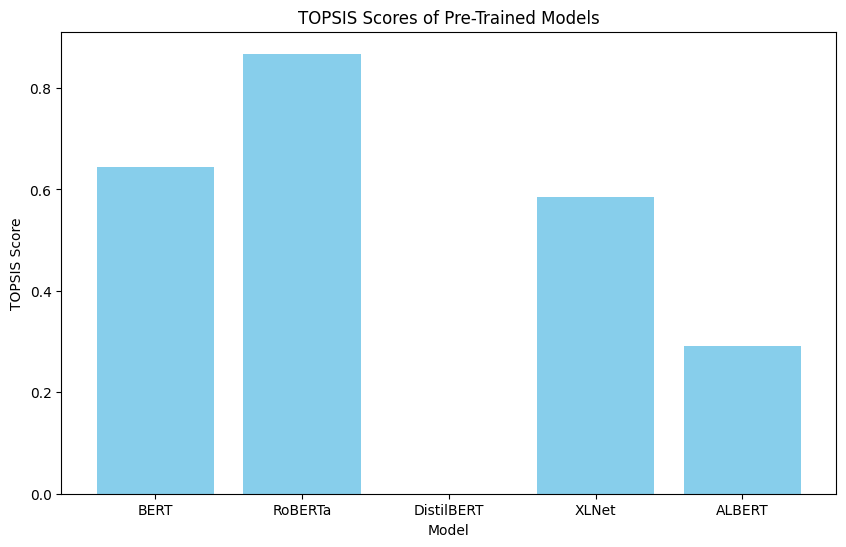

In [14]:
# Plot the TOPSIS scores
plt.figure(figsize=(10, 6))
plt.bar(data['Model'], data['TOPSIS Score'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('TOPSIS Score')
plt.title('TOPSIS Scores of Pre-Trained Models')
plt.show()